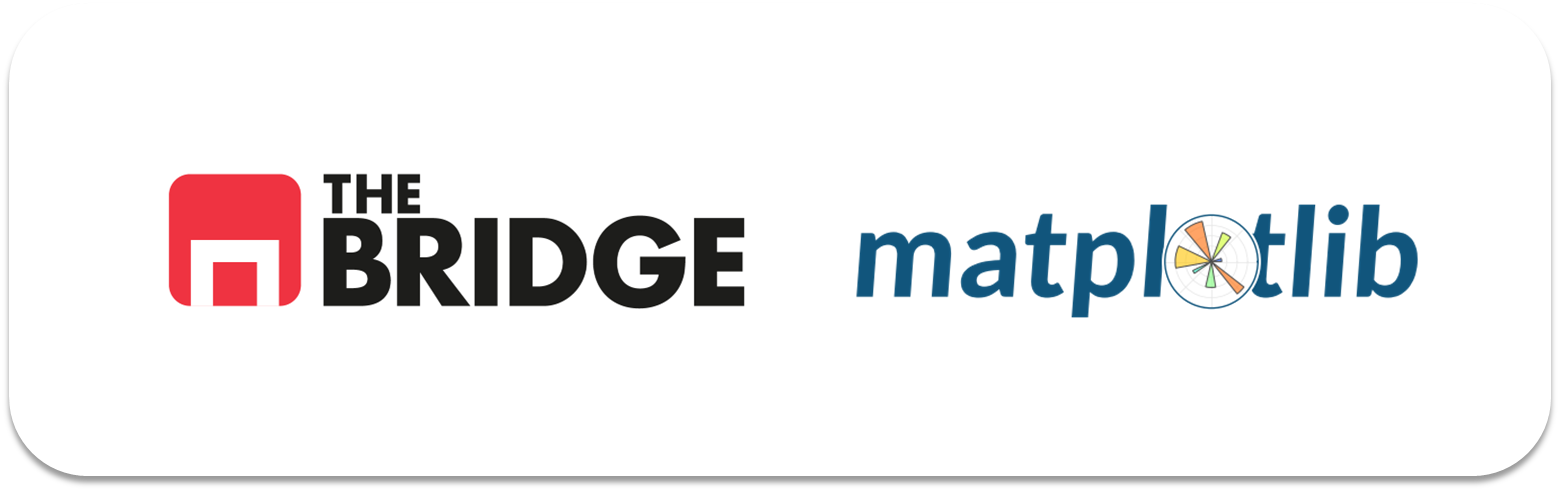

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [ ]:
ruta_dataset = "./data/california_cities.csv"
df_cities = pd.read_csv(ruta_dataset)
df_cities = df_cities.dropna()
df_cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

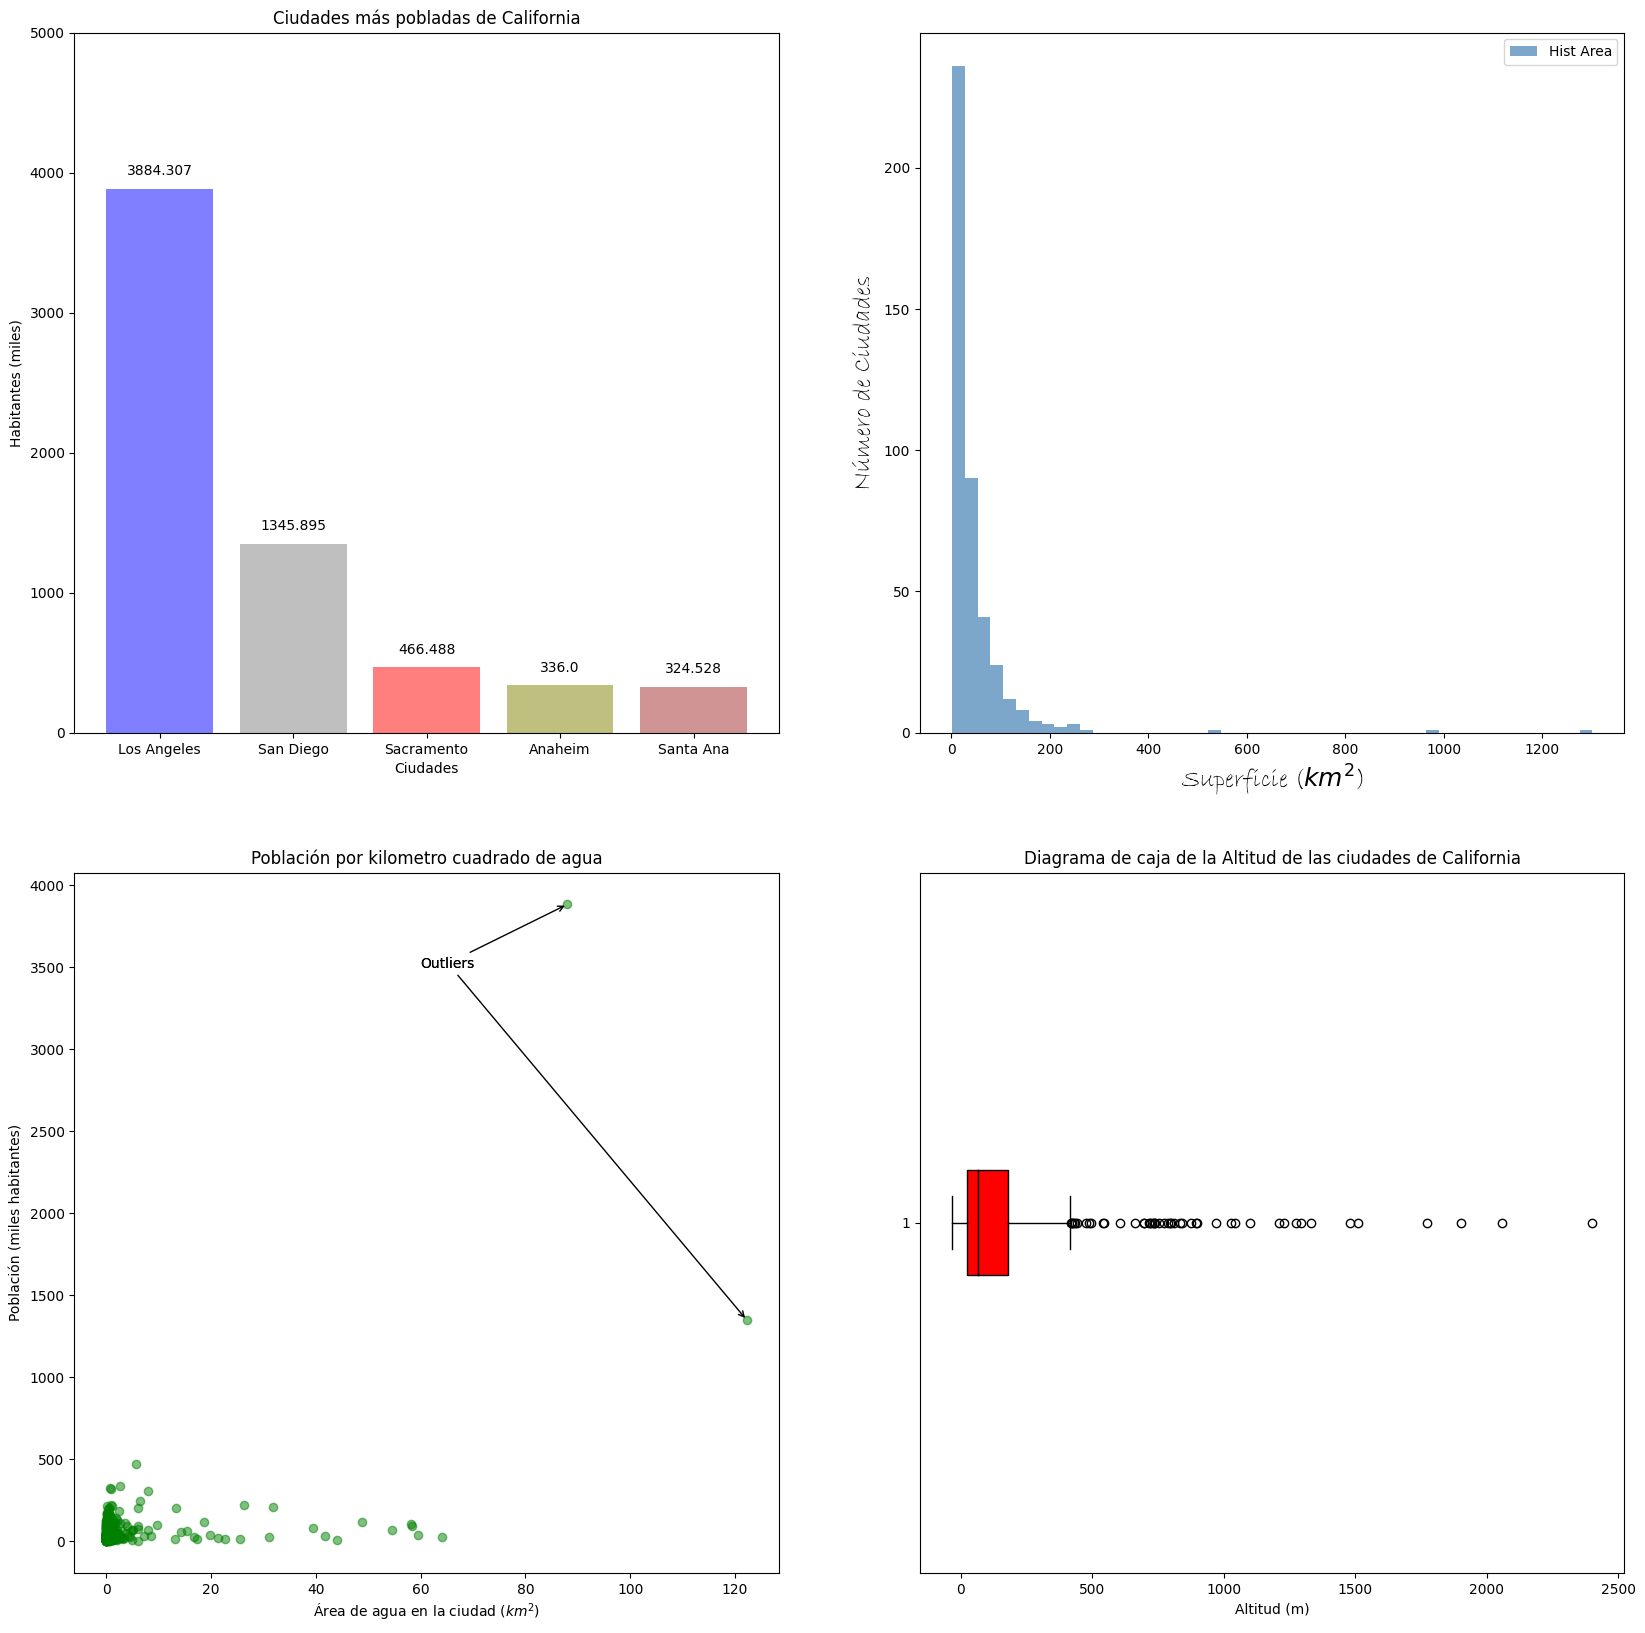

1. Las ciudades más pobladas, con los números de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)

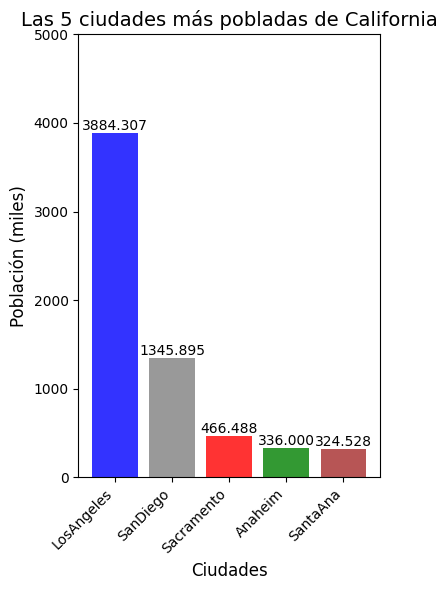

In [5]:
# Ordenar por población total y seleccionar las 5 ciudades más pobladas

df_top_cities = df_cities.nlargest(5, "population_total")

# Crear el gráfico de barras
plt.figure(figsize=(4, 6))
colores = ["blue", "gray", "red", "green", "brown"]
bars = plt.bar(
    df_top_cities["city"], 
    df_top_cities["population_total"] / 1000,  # Convertir población a miles
    color=colores,
    alpha=0.8
)
#Añadir etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, #calcula el centro de la barra en el eje x
        height,                            #vamos a colocar la etiqueta encima de la barra
        f'{height:.3f}',                   #cadena formateada para mostrar el valor de la altura con tres decimales

        ha = "center",                     #texto alineado horizontalmente en el centro de la barra
        va="bottom",                       #texto alineado en la parte inferior del texto, justo encima de la barra
        fontsize = 10,
        color = "black"
    )
# Personalizar el gráfico
plt.xlabel("Ciudades", fontsize=12)
plt.ylabel("Población (miles)", fontsize=12)
plt.title("Las 5 ciudades más pobladas de California", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Girar etiquetas del eje x
plt.ylim(0,5000)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)

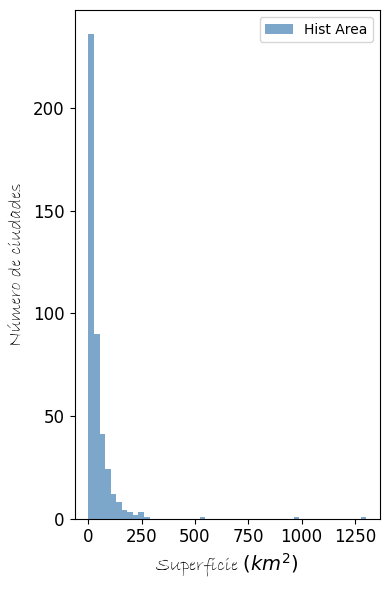

In [6]:
# Crear el histograma
plt.figure(figsize=(4, 6))
plt.hist(df_cities["area_total_km2"], bins=50, color="steelblue", alpha=0.7, label="Hist Area")  # Añadir etiqueta para la leyenda

# Personalizar el gráfico
plt.xlabel("Superficie " + r"$\mathbf{\mathit{(km^2)}}$", fontsize=14, fontname="Bradley Hand ITC")  # La etiqueta se compone de "Superfice" y el LaTeX: r de rawstring mathbf (negrita), mathit(cursiva) y km^2
plt.ylabel("Número de ciudades", fontsize=14, fontname="Bradley Hand ITC")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=10)  # Leyenda con título y posición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

3. El scatter de área de agua de un ciudad con su poblacion.

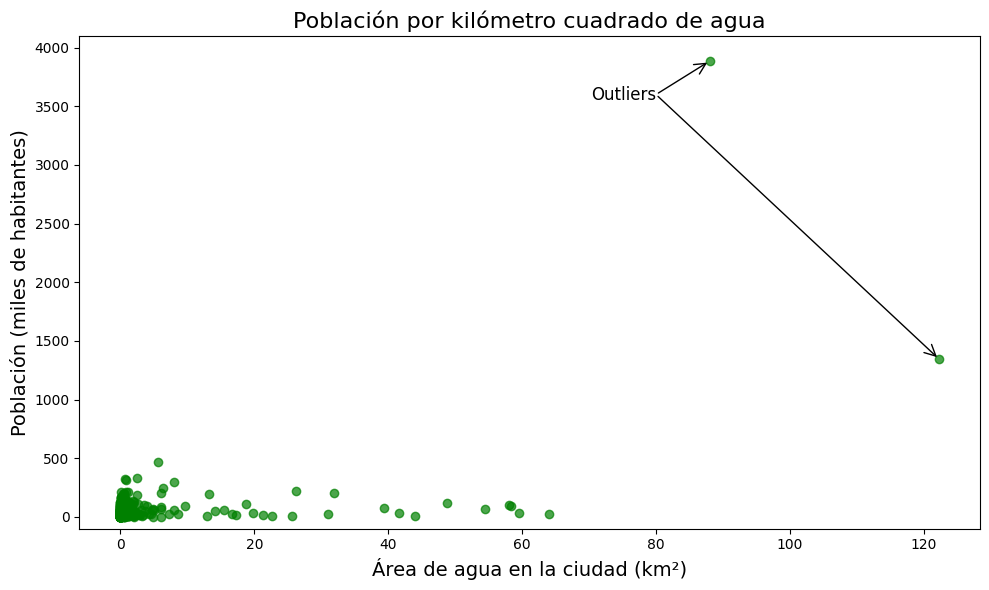

In [7]:
# Crear el scatter plot: área de agua vs población
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cities["area_water_km2"], 
    df_cities["population_total"]/1000, 
    color="green", 
    alpha=0.7
)

outlier_area= df_cities.nlargest(1, "area_water_km2")  # Seleccionar el valor más alto en área de agua
outlier_population =df_cities.nlargest(1, "population_total") # Seleccionar el valor más alto en population_total

#Coordenadas de los outliers
x_outlier_area = outlier_area["area_water_km2"].values[0]
y_outlier_area = outlier_area["population_total"].values[0] / 1000  # Convertir a miles

x_outlier_population = outlier_population["area_water_km2"].values[0]
y_outlier_population = outlier_population["population_total"].values[0] / 1000  # Convertir a miles

# Añadir flecha desde el outlier de área de agua hasta "Outliers"
arrow_area = FancyArrowPatch(
    posA=(x_outlier_area, y_outlier_area), 
    posB=(80, 3600),  # Coordenadas del texto "Outliers"
    arrowstyle="<-",
    mutation_scale=20,
    color="black"
)
plt.gca().add_patch(arrow_area)

# Añadir flecha desde el outlier de población hasta "Outliers"
arrow_population = FancyArrowPatch(
    posA=(x_outlier_population, y_outlier_population), 
    posB=(80, 3600),  # Coordenadas del texto "Outliers"
    arrowstyle="<-",  #pongo las flechas del revés para que señalen el outlier
    mutation_scale=20,
    color="black"
)
plt.gca().add_patch(arrow_population)

#Añadir texto
plt.text(80, 3600, "Outliers", fontsize=12, ha="right", va="center", color="black")  # Texto "Outliers"


# Personalizar el gráfico
plt.xlabel("Área de agua en la ciudad (km²)", fontsize=14)
plt.ylabel("Población (miles de habitantes)", fontsize=14)
plt.ylim(-100, 4100)
plt.title("Población por kilómetro cuadrado de agua", fontsize=16)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

4. El boxplot de la altura de las ciudades.

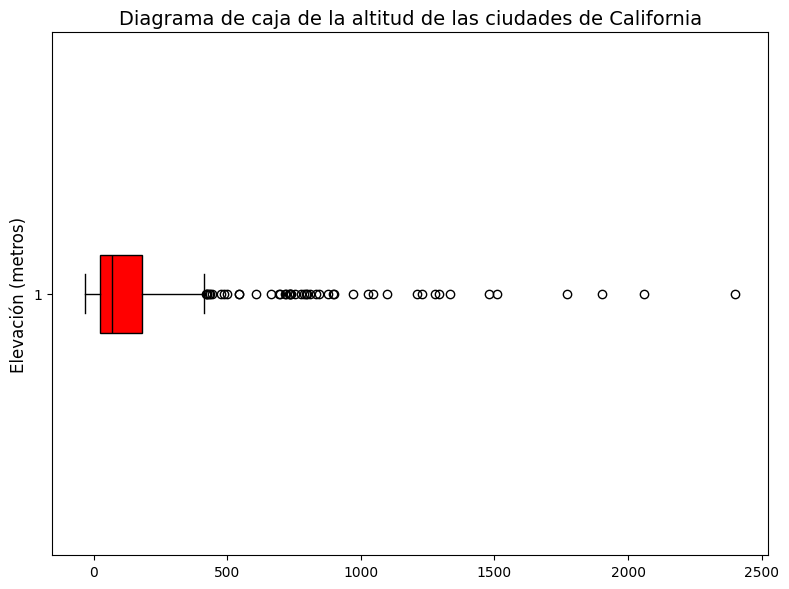

In [11]:
# Crear el boxplot de la altura de las ciudades
plt.figure(figsize=(8, 6))
plt.boxplot(df_cities["elevation_m"], vert=False, patch_artist=True, boxprops=dict(facecolor="red"), medianprops=dict(color="black"))
plt.ylabel("Elevación (metros)", fontsize=12)
plt.title("Diagrama de caja de la altitud de las ciudades de California", fontsize=14)

# Personalizar el diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

5. Unifico las cuatro gráficas en una figura:

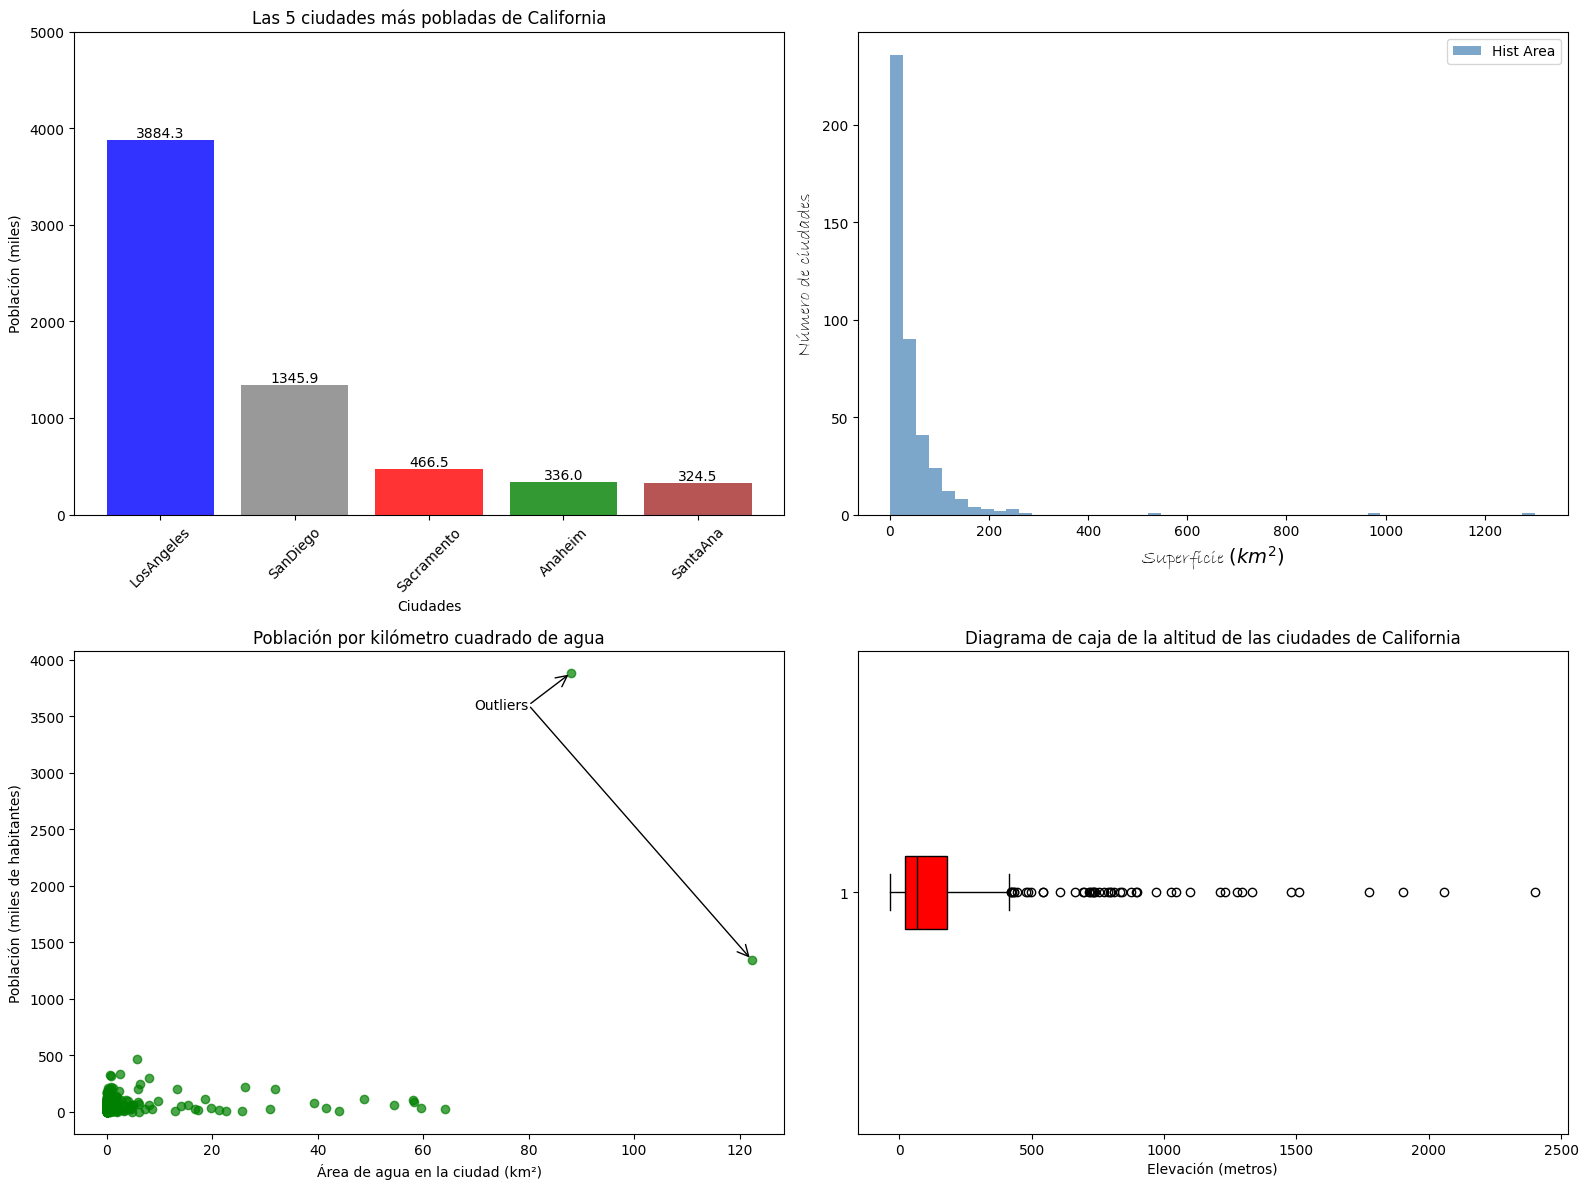

In [12]:
fig, axes = plt.subplots(2,2, figsize=(16,12))

#Primer gráfico:

df_top_cities = df_cities.nlargest(5, "population_total")
colores = ["blue", "gray", "red", "green", "brown"]

bars = axes[0,0].bar(
    df_top_cities["city"], 
    df_top_cities["population_total"] / 1000,  
    color=colores,
    alpha=0.8
)
for bar in bars:
    height = bar.get_height()
    axes[0,0].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}',

        ha = "center",
        va="bottom",
        fontsize = 10,
        color = "black"
    )

axes[0,0].set_xlabel("Ciudades")
axes[0,0].set_ylabel("Población (miles)")
axes[0,0].set_title("Las 5 ciudades más pobladas de California")
axes[0,0].tick_params(axis="x", rotation=45)  # Girar etiquetas del eje x
axes[0,0].set_ylim(0,5000)


#Segundo gráfico:
axes[0,1].hist(df_cities["area_total_km2"], bins=50, color="steelblue", alpha=0.7, label="Hist Area")  # Añadir etiqueta para la leyenda
axes[0,1].set_xlabel("Superficie " + r"$\mathbf{\mathit{(km^2)}}$", fontsize=14, fontname="Bradley Hand ITC")  
axes[0,1].set_ylabel("Número de ciudades", fontsize=14, fontname="Bradley Hand ITC")
axes[0,1].tick_params(axis="x")
axes[0,1].tick_params(axis="y")
axes[0,1].legend(loc="upper right")

#Tercer gráfico:


axes[1,0].scatter(
    df_cities["area_water_km2"], 
    df_cities["population_total"]/1000, 
    color="green", 
    alpha=0.7
)

outlier_area= df_cities.nlargest(1, "area_water_km2")  # Seleccionar el valor más alto en área de agua
outlier_population =df_cities.nlargest(1, "population_total") # Seleccionar el valor más alto en population_total

arrow_area = FancyArrowPatch(
    posA=(outlier_area["area_water_km2"].values[0], outlier_area["population_total"].values[0]/1000), 
    posB=(80, 3600),  
    arrowstyle="<-",
    mutation_scale=20,
    color="black"
)

arrow_population = FancyArrowPatch(
    posA=(outlier_population["area_water_km2"].values[0], outlier_population["population_total"].values[0]/1000), 
    posB=(80, 3600),  # Coordenadas del texto "Outliers"
    arrowstyle="<-",
    mutation_scale=20,
    color="black"
)

# Personalizar el gráfico
axes[1,0].add_patch(arrow_area)
axes[1,0].add_patch(arrow_population)
axes[1,0].text(80,3600, "Outliers", ha="right", va="center", color="black")
axes[1,0].set_xlabel("Área de agua en la ciudad (km²)")
axes[1,0].set_ylabel("Población (miles de habitantes)")
axes[1,0].set_title("Población por kilómetro cuadrado de agua")

#Cuarto:


axes[1,1].boxplot(
    df_cities["elevation_m"], 
    vert=False, 
    patch_artist=True, 
    boxprops=dict(facecolor="red"), 
    medianprops=dict(color="black")
)
axes[1,1].set_xlabel("Elevación (metros)")
axes[1,1].set_title("Diagrama de caja de la altitud de las ciudades de California")

#Ajustes de diseño
plt.tight_layout()
plt.savefig("figura_unificada.png", dpi=300)

plt.show()


### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.